In [1]:
! pip install soynlp

  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [1]:
import pandas as pd
import soynlp

In [6]:
# 연합뉴스 로딩
kor_corpus = pd.read_csv('kor_news.csv', encoding='cp949')

In [7]:
kor_corpus

,time,title,contents
0,2016/08/09 16:44,에스테틱 미용 시장 개척하는 광주 노아 메디컬,(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...
1,2016/08/09 15:37,청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원,(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...
2,2016/08/09 15:32,"고신대병원, 카자흐스탄에 두 번째 거점센터",(부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...
3,2016/08/09 15:19,국제패션문화페스티벌 자원봉사자 모집,(대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...
4,2016/08/09 14:42,"""中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야""",(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...
...,...,...,...
2585,2015/08/25 06:25,부산전통시장 특화사업 박차…12개 시장 대상,(부산=연합뉴스) 신정훈 기자 = 부산시가 글로벌 명품시장으로 선정된 국제시장을 비...
2586,2015/08/24 17:06,"김종덕 ""현대미술관 법인화 재추진…위상·체계 일신""(종합)",(서울=연합뉴스) 김중배 기자 = 김종덕 문화체육관광부 장관은 24일 국립현대미술관...
2587,2015/08/24 16:47,아이유 '마음' 들려주는 대북확성기 하루 8시간 방송,(서울=연합뉴스) 이영재 기자 = 한반도 긴장 해소를 위해 열린 남북 고위급접촉의 ...
2588,2015/08/24 16:47,"김종덕 문체부장관 취임 1년…""문화융성 구체화 성과""(종합)",(서울=연합뉴스) 김중배 기자 = 김종덕 문화체육관광부 장관이 지난 21일로 취임 ...


In [6]:
sents = ['최순실 씨가 외국인투자촉진법 개정안 통과와 예산안 반영까지 꼼꼼이 챙긴 건데, 이른바 외촉법, 어떤 법이길래 최 씨가 열심히 챙긴 걸까요. 자신의 이해관계와 맞아 떨어지는 부분이 없었는지 취재기자와 한걸음 더 들여다보겠습니다. 이서준 기자, 우선 외국인투자촉진법 개정안, 어떤 내용입니까?',
        '한마디로 대기업이 외국 투자를 받아 계열사를 설립할 때 규제를 완화시켜 주는 법안입니다. 대기업 지주사의 손자 회사가 이른바 증손회사를 만들 때 지분 100%를 출자해야 합니다. 대기업의 문어발식 계열사 확장을 막기 위한 조치인데요. 외촉법 개정안은 손자회사가 외국 투자를 받아서 증손회사를 만들 땐 예외적으로 50% 지분만 투자해도 되게끔 해주는 내용입니다.',
        '그만큼 쉽게 완화해주는 거잖아요. 그때 기억을 더듬어보면 야당의 반발이 매우 심했습니다. 그 이유가 뭐였죠? ',
        '대기업 특혜 법안이라는 취지였는데요. (당연히 그랬겠죠.) 당시 박영선 의원의 국회 발언을 들어보시겠습니다. [박영선 의원/더불어민주당 (2013년 12월 31일) : 경제의 근간을 흔드는 법을 무원칙적으로 이렇게 특정 재벌 회사에게 특혜를 주기 위해 간청하는 민원법을 우리가 새해부터 왜 통과시켜야 합니까.]',
        '최순실 씨 사건을 쫓아가다 보면 본의 아니게 이번 정부의 과거로 올라가면서 복기하는 듯한 느낌이 드는데 이것도 바로 그중 하나입니다. 생생하게 기억합니다. 이 때 장면들은. 특정 재벌 회사를 위한 특혜라고 말하는데, 어떤 기업을 말하는 건가요?',
        'SK와 GS 입니다. 개정안이 통과되는 걸 전제로 두 회사는 외국 투자를 받아 증손회사 설립을 진행중이었기 때문인데요. 당시 개정안이 통과되지 않으면 두 기업이 수조원의 손실이 생길 수 있는 것으로 알려져 있었습니다. 허창수 GS 회장과 김창근 SK회장은 2013년 8월 박 대통령과 청와대에서 대기업 회장단 오찬자리에서 외촉법 통과를 요청한 바도 있습니다. ',
        '물론 두 기업과 최순실 씨와 연결고리가 나온 건 아니지만, 정 전 비서관 녹취파일 속 최 씨는 외촉법에 상당히 집착을 하는 걸로 보이긴 합니다.',
        '네 그렇습니다. 통화 내용을 다시 짚어보면요. 최 씨는 외촉법 관련 예산이 12월 2일, 반드시 되어야 한다, 작년 예산으로 돼서는 안 된다고 얘기하고 있는데요. 다시 말해서 외촉법 관련 예산안이 내년에 반영되어야 한다고 압박을 하고 있는 겁니다. 그러면서 "국민을 볼모로 잡고 있다"며 "국회와 정치권에 책임을 묻겠다"고 으름장까지 놓고 있는데요. 매우 집착하는 모습인데요. 이에 대해서 정 전 비서관이 "예산이 그렇게 빨리 통과된 적 없습니다"고 말하자 말을 끊으면서 매우 흥분한 듯, "그렇더라도, 그렇더라도" 하면서 "야당이 공약 지키라고 하면서 협조는 안 한다", "대통령으로 할 수 있는 일이 없다", "불공정 사태와 난맥상이 나온다"며 굉장한 압박까지 하고 있습니다.',
        '이 얘기들만 들여다봐도 마치 본인이 대통령처럼 얘기하고 있습니다. 내용들 보면 그렇지 않습니까? 혹시 최 씨가 이 외촉법 통과로 이득을 본 경우도 있습니까. ',
        '최 씨가 입김을 넣어 차은택 씨가 주도를 한 걸로 알려진 K컬처밸리 사업이 그렇다는 얘기가 나오고 있습니다. 외촉법을 편법으로 활용해 1% 금리를 적용받았다는 지적이 나오고 있습니다. 본격 사업이 추진되기 전 최순실 국정개입 사건이 터지기는 했지만, 이외에도 다른 혜택을 받았는지는 조사가 필요해 보입니다. ',
        '그런데 녹취파일을 보면 "남자1"이 등장합니다. 이 사람은 누구입니까?',
        '정 전 비서관을 "정 과장님"으로 부르며 반말을 하는 남자인데요. 최순실 씨처럼 정 전 비서관을 하대하고 있습니다. 또 청와대 내부 정보를 알고 있는 듯하고 또 인사에까지 개입하려고 하고 있습니다. 그렇기 때문에 정윤회 씨로 추정은 됩니다만 확인은 되지 않습니다.'
]

In [2]:
from soynlp.noun import LRNounExtractor
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer

In [7]:
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(sents) # list of str like

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (41, 33) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 3 nouns are extracted


In [8]:
# 문장 단위 말뭉치 생성 
corpus = DoublespaceLineCorpus("2016-10-20.txt", iter_sent=True)
len(corpus)  # 문장의 갯수

NameError: name 'DoublespaceLineCorpus' is not defined

In [5]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)

NameError: name 'corpus' is not defined

In [17]:
word_score = word_extractor.extract()

all cohesion probabilities was computed. # words = 63473
all branching entropies was computed # words = 116340
all accessor variety was computed # words = 116340


In [18]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score.items()}
l_tokenizer = LTokenizer(scores=scores)

l_tokenizer.tokenize("안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다", flatten=False)

[('안전', '성에'),
 ('문제', '있는'),
 ('스마트폰', '을'),
 ('휴대', '하고'),
 ('탑승', '할'),
 ('경우', '에'),
 ('압수', '한다')]

In [21]:
test_1=kor_corpus['contents'][0]
test_1

'(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척하는 광주지역 업체가 있어 눈길을 끌고 있다. 노아 메디컬은 1993년 설립한 전문에스테틱 기업으로 에스테틱 화장품과 미용기기 건강기기, 식품 등의 다양한 제품군을 보유하고 있다. 특히 원액추물을 사용한 캐비어 앰플과 태반 앰플, 셀룰라이트 오일, 카페인 성분이 함유된 다이어트용 슬리밍 크림 등이 높은 호응을 얻었다. 전체기사 본문배너 노아메디컬은 13년 전 화장품 회사에서 근무하던 이한수 대표가 프랑스 화장품 단일 브랜드를 취급하면서 세웠다. 사업초기 문전박대와 투자실패를 딛고 현재는 50개 제품브랜드를 직접 제조하고 유통하고 있으며 자산규모 15억원, 연매출 5억원의 견실한 중소기업으로 성장했다. 특히 광주전남지역에서는 여전히 생소한 에스테틱 분야에서 현재 10여종이 넘는 관련 분야 특허 외 의장등록, 상표등록을 보유하며 지역 업체를 선도하고 있다. 2013년 개발해 선보인 온열테라피와 온열석션기는 시장 반응도 좋다는 것이 업체의 설명이다. 전통적인 온돌방식에서 착안한 온열테라피는 신체의 물리적 순환시스템을 활발하게 해 복부 지방분해를 돕고 몸의 독소를 제거하는 효과를 거두고 있다. 온열석션기도 세라믹 코팅을 접목해 차갑고 딱딱한 기존 일반 석션기에 비해 음이온 발생과 원적외선 온열기능이 뛰어난 것으로 알려졌다. 노아 메디컬은 지역대학과도 협의해 다음 달에도 신제품을 출시해 기존 제품과 함께 중국시장에도 진출할 계획이다. 이한수 대표는 9일 광주상의에서 열린 제품 브리핑에서 "국내 에스테틱 시장뿐만 아니라 세계 시장으로 영역을 넓혀 에스테틱 한류문화를 이끌고자 한다"고 말했다. '

In [24]:
test_2=l_tokenizer.tokenize(test_1, flatten=False)
test_2

[('(광주=연합뉴스)', ''),
 ('여운창', ''),
 ('기자', ''),
 ('=', ''),
 ('날로', ''),
 ('커가는', ''),
 ('피부', '·미용분야의'),
 ('에스테틱', ''),
 ('시장', '을'),
 ('개척하', '는'),
 ('광주', '지역'),
 ('업체', '가'),
 ('있어', ''),
 ('눈길을', ''),
 ('끌고', ''),
 ('있다', '.'),
 ('노아', ''),
 ('메디컬', '은'),
 ('1993년', ''),
 ('설립', '한'),
 ('전문', '에스테틱'),
 ('기업으로', ''),
 ('에스테틱', ''),
 ('화장품', '과'),
 ('미용기기', ''),
 ('건강', '기기,'),
 ('식품', ''),
 ('등의', ''),
 ('다양한', ''),
 ('제품군을', ''),
 ('보유하고', ''),
 ('있다', '.'),
 ('특히', ''),
 ('원액추물을', ''),
 ('사용한', ''),
 ('캐비어', ''),
 ('앰플과', ''),
 ('태반', ''),
 ('앰플,', ''),
 ('셀룰라이트', ''),
 ('오일,', ''),
 ('카페', '인'),
 ('성분이', ''),
 ('함유된', ''),
 ('다이어트', '용'),
 ('슬리밍', ''),
 ('크림', ''),
 ('등이', ''),
 ('높은', ''),
 ('호응을', ''),
 ('얻었다', '.'),
 ('전체기사', ''),
 ('본문배너', ''),
 ('노아메디컬은', ''),
 ('13년', ''),
 ('전', ''),
 ('화장품', ''),
 ('회사', '에서'),
 ('근무하', '던'),
 ('이한수', ''),
 ('대표가', ''),
 ('프랑스', ''),
 ('화장품', ''),
 ('단일', ''),
 ('브랜드', '를'),
 ('취급하', '면서'),
 ('세웠다', '.'),
 ('사업', '초기'),
 ('문전박대와', ''),
 (

In [28]:
test_2[11][0]

'업체'

In [30]:
word_list=[]

for i in test_2:
    word_list.append(i[0])

In [31]:
word_list

['(광주=연합뉴스)',
 '여운창',
 '기자',
 '=',
 '날로',
 '커가는',
 '피부',
 '에스테틱',
 '시장',
 '개척하',
 '광주',
 '업체',
 '있어',
 '눈길을',
 '끌고',
 '있다',
 '노아',
 '메디컬',
 '1993년',
 '설립',
 '전문',
 '기업으로',
 '에스테틱',
 '화장품',
 '미용기기',
 '건강',
 '식품',
 '등의',
 '다양한',
 '제품군을',
 '보유하고',
 '있다',
 '특히',
 '원액추물을',
 '사용한',
 '캐비어',
 '앰플과',
 '태반',
 '앰플,',
 '셀룰라이트',
 '오일,',
 '카페',
 '성분이',
 '함유된',
 '다이어트',
 '슬리밍',
 '크림',
 '등이',
 '높은',
 '호응을',
 '얻었다',
 '전체기사',
 '본문배너',
 '노아메디컬은',
 '13년',
 '전',
 '화장품',
 '회사',
 '근무하',
 '이한수',
 '대표가',
 '프랑스',
 '화장품',
 '단일',
 '브랜드',
 '취급하',
 '세웠다',
 '사업',
 '문전박대와',
 '투자',
 '딛고',
 '현재',
 '50',
 '제품',
 '직접',
 '제조하고',
 '유통하고',
 '있으며',
 '자산규모',
 '15억원,',
 '연매출',
 '5억원',
 '견실한',
 '중소기업',
 '성장했다',
 '특히',
 '광주',
 '여전히',
 '생소한',
 '에스테틱',
 '분야에서',
 '현재',
 '10',
 '넘는',
 '관련',
 '분야',
 '특허',
 '외',
 '의장등록,',
 '상표등록을',
 '보유하',
 '지역',
 '업체',
 '선도하',
 '있다',
 '20',
 '개발',
 '선보인',
 '온열테라피와',
 '온열석션기는',
 '시장',
 '반응도',
 '좋다',
 '것이',
 '업체',
 '설명',
 '전통적인',
 '온돌방식에서',
 '착안한',
 '온열테라피는',
 '신체의',
 '물리적',
 '순환시스템을',
 '활발하게',
 '해',
 

In [53]:
import re
from tqdm import tqdm
tqdm.pandas()
customized_stopwords_list=['있는', '했다', '기자', '10', '20', '전체기사','본문배너','등을', '우리','수','20','말했다','밝혔다','이','대한','했다']
def text_preprocessing(text):
    global token_words
    #ex2=text.lower()
    try:
        ex2= re.sub(r'[.\,\!\:\@\#\$\%\&\*\+\;\▲\=\/\(\)\[\]]','',text)
        ex3 =l_tokenizer.tokenize(text, flatten=False)

        token_words = []
        for word in ex3:
            token_words.append(word[0])
            
    except AttributeError:
        pass
    except UnboundLocalError:
        pass
                
    return token_words



In [54]:
z=text_preprocessing(kor_corpus['contents'][3])
z

['(대구=연합뉴스)',
 '한국',
 '20',
 '대구국제패션문화페스티벌',
 '자원봉사자',
 '모집한다',
 '10',
 '1일부터',
 '7일까지',
 '한류패션콘서트와',
 '대구',
 '출신',
 '디자이너',
 '패션쇼',
 '한·중',
 '전통의복',
 '패션쇼',
 '활동',
 '전체기사',
 '본문배너',
 '행사',
 '지원',
 '통·번역(영어,',
 '기타',
 '외국',
 '부문에',
 '18세',
 '이상',
 '성인은',
 '누구나',
 '지원',
 '수',
 '있다',
 '행사',
 '전',
 '4차례',
 '교육',
 '하고',
 '자원봉사',
 '발급,',
 '티셔츠',
 '및',
 '일비',
 '지급',
 '등',
 '혜택',
 '준다',
 '대구문화예술회관',
 '16∼18일',
 'DAC인문학극장',
 '(대구=연합뉴스)',
 '대구문화예술회관은',
 '16일',
 '18일까지',
 '팔공홀에서',
 '20',
 'DAC인문학극장',
 "'한국의",
 '지성,',
 '대구를',
 "말하다'를",
 '연다.',
 '사흘간',
 '이어',
 '도시',
 '대구를',
 '꿈꾸',
 '최재천(나의',
 '삶,',
 '대구에서',
 '삶),',
 '이문열(대구의',
 '과거',
 '현재',
 '미래',
 '차례로',
 '출연한다',
 '공연장이',
 '삶에',
 '대한',
 '생각',
 '공유하는',
 '공간이',
 '될',
 '수',
 '있음을',
 '보여주',
 '취지로',
 '기획했다']

In [55]:
tqdm.pandas()
kor_corpus["전처리후"]=kor_corpus['contents'].progress_apply(lambda x: text_preprocessing(x))

100%|██████████████████████████████████| 2590/2590 [00:01<00:00, 1457.73it/s]


In [56]:
kor_corpus

,time,title,contents,전처리후
0,2016/08/09 16:44,에스테틱 미용 시장 개척하는 광주 노아 메디컬,(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...,"[(광주=연합뉴스), 여운창, 기자, =, 날로, 커가는, 피부, 에스테틱, 시장,..."
1,2016/08/09 15:37,청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원,(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...,"[(구미=연합뉴스), 박순기, 기자, =, 노래·춤, 경연으로, 청소년, 꿈과, 열..."
2,2016/08/09 15:32,"고신대병원, 카자흐스탄에 두 번째 거점센터",(부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...,"[(부산=연합뉴스), 박창수, 기자, =, 고신대, 복음병원은, 카자흐스탄, 제2,..."
3,2016/08/09 15:19,국제패션문화페스티벌 자원봉사자 모집,(대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...,"[(대구=연합뉴스), 한국, 20, 대구국제패션문화페스티벌, 자원봉사자, 모집한다,..."
4,2016/08/09 14:42,"""中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야""",(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...,"[(세종=연합뉴스), 김영, 기자, =, 한국, 고고도, 미사일, 방어체계(THAA..."
...,...,...,...,...
2585,2015/08/25 06:25,부산전통시장 특화사업 박차…12개 시장 대상,(부산=연합뉴스) 신정훈 기자 = 부산시가 글로벌 명품시장으로 선정된 국제시장을 비...,"[(부산=연합뉴스), 신정훈, 기자, =, 부산, 글로벌, 명품시장으로, 선정된, ..."
2586,2015/08/24 17:06,"김종덕 ""현대미술관 법인화 재추진…위상·체계 일신""(종합)",(서울=연합뉴스) 김중배 기자 = 김종덕 문화체육관광부 장관은 24일 국립현대미술관...,"[(서울=연합뉴스), 김중배, 기자, =, 김종덕, 문화체육관광부, 장관, 24일,..."
2587,2015/08/24 16:47,아이유 '마음' 들려주는 대북확성기 하루 8시간 방송,(서울=연합뉴스) 이영재 기자 = 한반도 긴장 해소를 위해 열린 남북 고위급접촉의 ...,"[(서울=연합뉴스), 이영재, 기자, =, 한반도, 긴장, 해소를, 위해, 열린, ..."
2588,2015/08/24 16:47,"김종덕 문체부장관 취임 1년…""문화융성 구체화 성과""(종합)",(서울=연합뉴스) 김중배 기자 = 김종덕 문화체육관광부 장관이 지난 21일로 취임 ...,"[(서울=연합뉴스), 김중배, 기자, =, 김종덕, 문화체육관광부, 장관, 지난, ..."


In [57]:
total_words_lists=[]

for words in kor_corpus["전처리후"]:
    for i in words:
        total_words_lists.append(''.join(i))
    

total_words_lists

['(광주=연합뉴스)',
 '여운창',
 '기자',
 '=',
 '날로',
 '커가는',
 '피부',
 '에스테틱',
 '시장',
 '개척하',
 '광주',
 '업체',
 '있어',
 '눈길을',
 '끌고',
 '있다',
 '노아',
 '메디컬',
 '1993년',
 '설립',
 '전문',
 '기업으로',
 '에스테틱',
 '화장품',
 '미용기기',
 '건강',
 '식품',
 '등의',
 '다양한',
 '제품군을',
 '보유하고',
 '있다',
 '특히',
 '원액추물을',
 '사용한',
 '캐비어',
 '앰플과',
 '태반',
 '앰플,',
 '셀룰라이트',
 '오일,',
 '카페',
 '성분이',
 '함유된',
 '다이어트',
 '슬리밍',
 '크림',
 '등이',
 '높은',
 '호응을',
 '얻었다',
 '전체기사',
 '본문배너',
 '노아메디컬은',
 '13년',
 '전',
 '화장품',
 '회사',
 '근무하',
 '이한수',
 '대표가',
 '프랑스',
 '화장품',
 '단일',
 '브랜드',
 '취급하',
 '세웠다',
 '사업',
 '문전박대와',
 '투자',
 '딛고',
 '현재',
 '50',
 '제품',
 '직접',
 '제조하고',
 '유통하고',
 '있으며',
 '자산규모',
 '15억원,',
 '연매출',
 '5억원',
 '견실한',
 '중소기업',
 '성장했다',
 '특히',
 '광주',
 '여전히',
 '생소한',
 '에스테틱',
 '분야에서',
 '현재',
 '10',
 '넘는',
 '관련',
 '분야',
 '특허',
 '외',
 '의장등록,',
 '상표등록을',
 '보유하',
 '지역',
 '업체',
 '선도하',
 '있다',
 '20',
 '개발',
 '선보인',
 '온열테라피와',
 '온열석션기는',
 '시장',
 '반응도',
 '좋다',
 '것이',
 '업체',
 '설명',
 '전통적인',
 '온돌방식에서',
 '착안한',
 '온열테라피는',
 '신체의',
 '물리적',
 '순환시스템을',
 '활발하게',
 '해',
 

In [58]:
from collections import Counter
word_counts=Counter(total_words_lists)
word_counts

Counter({'(광주=연합뉴스)': 13,
         '여운창': 2,
         '기자': 2389,
         '=': 4271,
         '날로': 16,
         '커가는': 1,
         '피부': 73,
         '에스테틱': 6,
         '시장': 1210,
         '개척하': 17,
         '광주': 213,
         '업체': 444,
         '있어': 291,
         '눈길을': 80,
         '끌고': 89,
         '있다': 5289,
         '노아': 2,
         '메디컬': 6,
         '1993년': 16,
         '설립': 336,
         '전문': 302,
         '기업으로': 35,
         '화장품': 884,
         '미용기기': 1,
         '건강': 166,
         '식품': 247,
         '등의': 581,
         '다양한': 752,
         '제품군을': 2,
         '보유하고': 20,
         '특히': 667,
         '원액추물을': 1,
         '사용한': 19,
         '캐비어': 1,
         '앰플과': 1,
         '태반': 2,
         '앰플,': 1,
         '셀룰라이트': 1,
         '오일,': 2,
         '카페': 44,
         '성분이': 5,
         '함유된': 3,
         '다이어트': 8,
         '슬리밍': 1,
         '크림': 2,
         '등이': 799,
         '높은': 332,
         '호응을': 41,
         '얻었다': 72,
         '전체기사': 2551,


In [59]:
word_counts.most_common(50)

[('한국', 7411),
 ('중국', 6040),
 ('있다', 5289),
 ('등', 5207),
 ('=', 4271),
 ('20', 3674),
 ('수', 3092),
 ('지난', 2783),
 ('전체기사', 2551),
 ('본문배너', 2551),
 ('▲', 2528),
 ('문화', 2414),
 ('기자', 2389),
 ('있는', 2098),
 ('10', 1975),
 ('드라마', 1928),
 ('한류', 1927),
 ('수출', 1918),
 ('말했다', 1895),
 ('밝혔다', 1828),
 ('이', 1816),
 ('것으로', 1668),
 ('통해', 1658),
 ('서울', 1580),
 ('위해', 1577),
 ('세계', 1570),
 ('(서울=연합뉴스)', 1569),
 ('우리', 1536),
 ('등을', 1531),
 ('대한', 1504),
 ('했다', 1439),
 ('방송', 1378),
 ('행사', 1368),
 ('국내', 1357),
 ('일본', 1357),
 ('올해', 1326),
 ('한', 1315),
 ('콘텐츠', 1262),
 ('정부', 1233),
 ('함께', 1226),
 ('시장', 1210),
 ('관광', 1143),
 ('한다', 1140),
 ('위한', 1094),
 ('현지', 1057),
 ('대통령', 1050),
 ('또', 1043),
 ('그는', 1040),
 ('해외', 1039),
 ('미국', 1028)]

In [85]:
import re
from tqdm import tqdm
tqdm.pandas()
customized_stopwords_list=['있는', '했다', '기자', '10','=','본문배너','등','(서울=연합뉴스)','지난','▲','본문배너', '20', '전체기사','본문배너','등을', '우리','수','20','=','말했다','밝혔다','이','대한','했다','또','그는','한다']
def text_preprocessing_2(text):
    global token_words
    #ex2=text.lower()
    try:
        ex2= re.sub(r'[.\,\!\:\@\#\$\%\&\*\+\;\▲\=\/\(\)\[\]]','',text)
        ex3 =l_tokenizer.tokenize(text, flatten=False)

        token_words = []
        for word in ex3:
            token_words.append(word[0])
        
        # 불용어 제거
        for word in token_words:
            if word in customized_stopwords_list:
                while word in token_words: token_words.remove(word)


    except AttributeError:
        pass
    except UnboundLocalError:
        pass
    except TypeError:
        pass
    return token_words



In [86]:
tqdm.pandas()
kor_corpus["전처리후"]=kor_corpus['contents'].progress_apply(lambda x: text_preprocessing_2(x))

100%|██████████████████████████████████| 2590/2590 [00:02<00:00, 1178.20it/s]


In [87]:
total_words_lists=[]

for words in kor_corpus["전처리후"]:
    for i in words:
        total_words_lists.append(''.join(i))
    

total_words_lists

['(광주=연합뉴스)',
 '여운창',
 '=',
 '날로',
 '커가는',
 '피부',
 '에스테틱',
 '시장',
 '개척하',
 '광주',
 '업체',
 '있어',
 '눈길을',
 '끌고',
 '있다',
 '노아',
 '메디컬',
 '1993년',
 '설립',
 '전문',
 '기업으로',
 '에스테틱',
 '화장품',
 '미용기기',
 '건강',
 '식품',
 '등의',
 '다양한',
 '제품군을',
 '보유하고',
 '있다',
 '특히',
 '원액추물을',
 '사용한',
 '캐비어',
 '앰플과',
 '태반',
 '앰플,',
 '셀룰라이트',
 '오일,',
 '카페',
 '성분이',
 '함유된',
 '다이어트',
 '슬리밍',
 '크림',
 '등이',
 '높은',
 '호응을',
 '얻었다',
 '본문배너',
 '노아메디컬은',
 '13년',
 '전',
 '화장품',
 '회사',
 '근무하',
 '이한수',
 '대표가',
 '프랑스',
 '화장품',
 '단일',
 '브랜드',
 '취급하',
 '세웠다',
 '사업',
 '문전박대와',
 '투자',
 '딛고',
 '현재',
 '50',
 '제품',
 '직접',
 '제조하고',
 '유통하고',
 '있으며',
 '자산규모',
 '15억원,',
 '연매출',
 '5억원',
 '견실한',
 '중소기업',
 '성장했다',
 '특히',
 '광주',
 '여전히',
 '생소한',
 '에스테틱',
 '분야에서',
 '현재',
 '넘는',
 '관련',
 '분야',
 '특허',
 '외',
 '의장등록,',
 '상표등록을',
 '보유하',
 '지역',
 '업체',
 '선도하',
 '있다',
 '개발',
 '선보인',
 '온열테라피와',
 '온열석션기는',
 '시장',
 '반응도',
 '좋다',
 '것이',
 '업체',
 '설명',
 '전통적인',
 '온돌방식에서',
 '착안한',
 '온열테라피는',
 '신체의',
 '물리적',
 '순환시스템을',
 '활발하게',
 '해',
 '복부',
 '지방분해를',
 '돕고',
 '몸의',


In [88]:
from collections import Counter
word_counts=Counter(total_words_lists)
word_counts

Counter({'(광주=연합뉴스)': 13,
         '여운창': 2,
         '=': 2138,
         '날로': 16,
         '커가는': 1,
         '피부': 73,
         '에스테틱': 6,
         '시장': 1210,
         '개척하': 17,
         '광주': 213,
         '업체': 444,
         '있어': 291,
         '눈길을': 80,
         '끌고': 89,
         '있다': 5289,
         '노아': 2,
         '메디컬': 6,
         '1993년': 16,
         '설립': 336,
         '전문': 302,
         '기업으로': 35,
         '화장품': 884,
         '미용기기': 1,
         '건강': 166,
         '식품': 247,
         '등의': 581,
         '다양한': 752,
         '제품군을': 2,
         '보유하고': 20,
         '특히': 667,
         '원액추물을': 1,
         '사용한': 19,
         '캐비어': 1,
         '앰플과': 1,
         '태반': 2,
         '앰플,': 1,
         '셀룰라이트': 1,
         '오일,': 2,
         '카페': 44,
         '성분이': 5,
         '함유된': 3,
         '다이어트': 8,
         '슬리밍': 1,
         '크림': 2,
         '등이': 799,
         '높은': 332,
         '호응을': 41,
         '얻었다': 72,
         '본문배너': 2324,
         '노아메디컬은': 1,

In [89]:
word_counts.most_common(50)

[('한국', 7411),
 ('중국', 6040),
 ('있다', 5289),
 ('문화', 2414),
 ('본문배너', 2324),
 ('=', 2138),
 ('드라마', 1928),
 ('한류', 1927),
 ('수출', 1918),
 ('것으로', 1668),
 ('통해', 1658),
 ('서울', 1580),
 ('위해', 1577),
 ('세계', 1570),
 ('방송', 1378),
 ('행사', 1368),
 ('국내', 1357),
 ('일본', 1357),
 ('올해', 1326),
 ('한', 1315),
 ('콘텐츠', 1262),
 ('정부', 1233),
 ('함께', 1226),
 ('시장', 1210),
 ('관광', 1143),
 ('위한', 1094),
 ('현지', 1057),
 ('대통령', 1050),
 ('해외', 1039),
 ('미국', 1028),
 ('이번', 1000),
 ('이어', 982),
 ('및', 973),
 ('관련', 971),
 ('경제', 946),
 ('관광객', 931),
 ('투자', 924),
 ('이날', 906),
 ('화장품', 884),
 ('대표', 881),
 ('운영', 879),
 ('진행', 863),
 ('더', 861),
 ('산업', 851),
 ('지원', 842),
 ('최근', 839),
 ('지역', 818),
 ('사업', 811),
 ('예정이다', 808),
 ('규모', 808)]

In [90]:
word_count_df=pd.DataFrame(word_counts.most_common(50))
word_count_df.columns=['words','counts']

In [91]:
! pip install seaborn

In [92]:
plt.rc('font', family='Malgun Gothic') # 폰트 지정

<AxesSubplot:xlabel='counts', ylabel='words'>

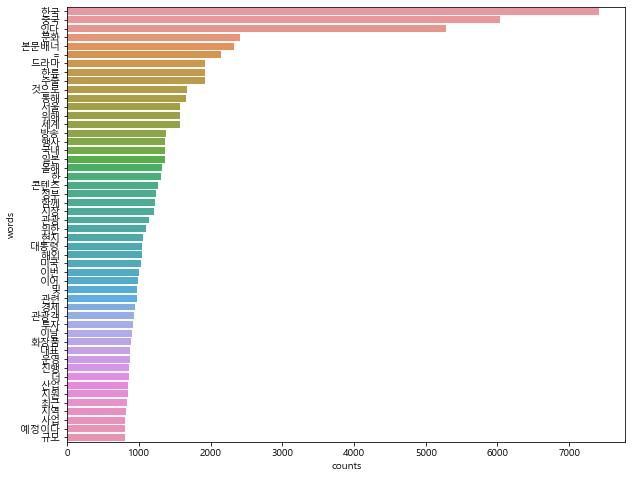

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='words', data=word_count_df)